## Implementing of the Stochastic Gradient Descent Classifier for Binary Classification Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from PIL import Image

In [2]:
dataset=make_classification(n_samples=1000,n_features=4)

In [3]:
X=dataset[0]
y=dataset[1]

Text(0.5, 1.0, 'Classified All Data')

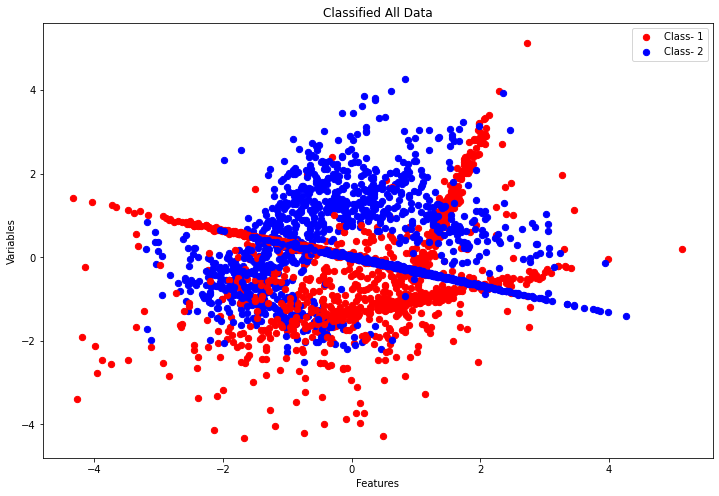

In [4]:
plt.figure(figsize=(12,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 40, c = 'red', label = 'Class- 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 40, c = 'blue', label = 'Class- 2')

plt.scatter(X[y == 0, 1], X[y == 0, 2], s = 40, c = 'red')
plt.scatter(X[y == 1, 1], X[y == 1, 2], s = 40, c = 'blue')

plt.scatter(X[y == 0, 2], X[y == 0, 3], s = 40, c = 'red')
plt.scatter(X[y == 1, 2], X[y == 1, 3], s = 40, c = 'blue')
plt.legend()
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Classified All Data')

Text(0.5, 1.0, 'Unclassified All Data')

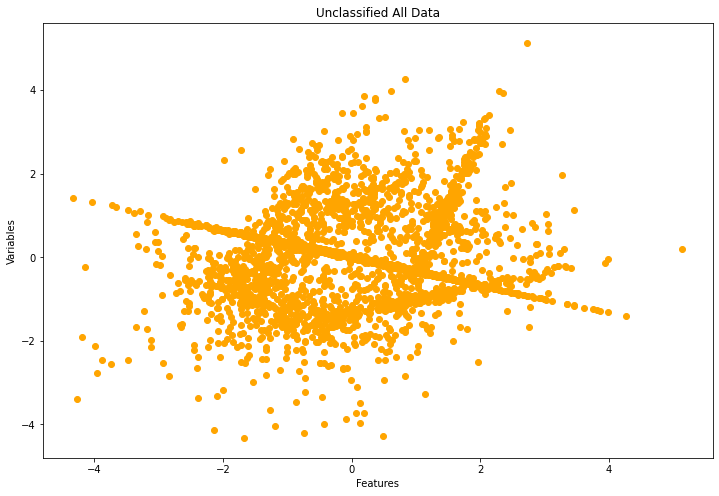

In [5]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],c='orange')
plt.scatter(X[:,1],X[:,2],c='orange')
plt.scatter(X[:,2],X[:,3],c='orange')
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Unclassified All Data')

In [6]:
sc=StandardScaler()
X=sc.fit_transform(X)

In [7]:
X.shape

(1000, 4)

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

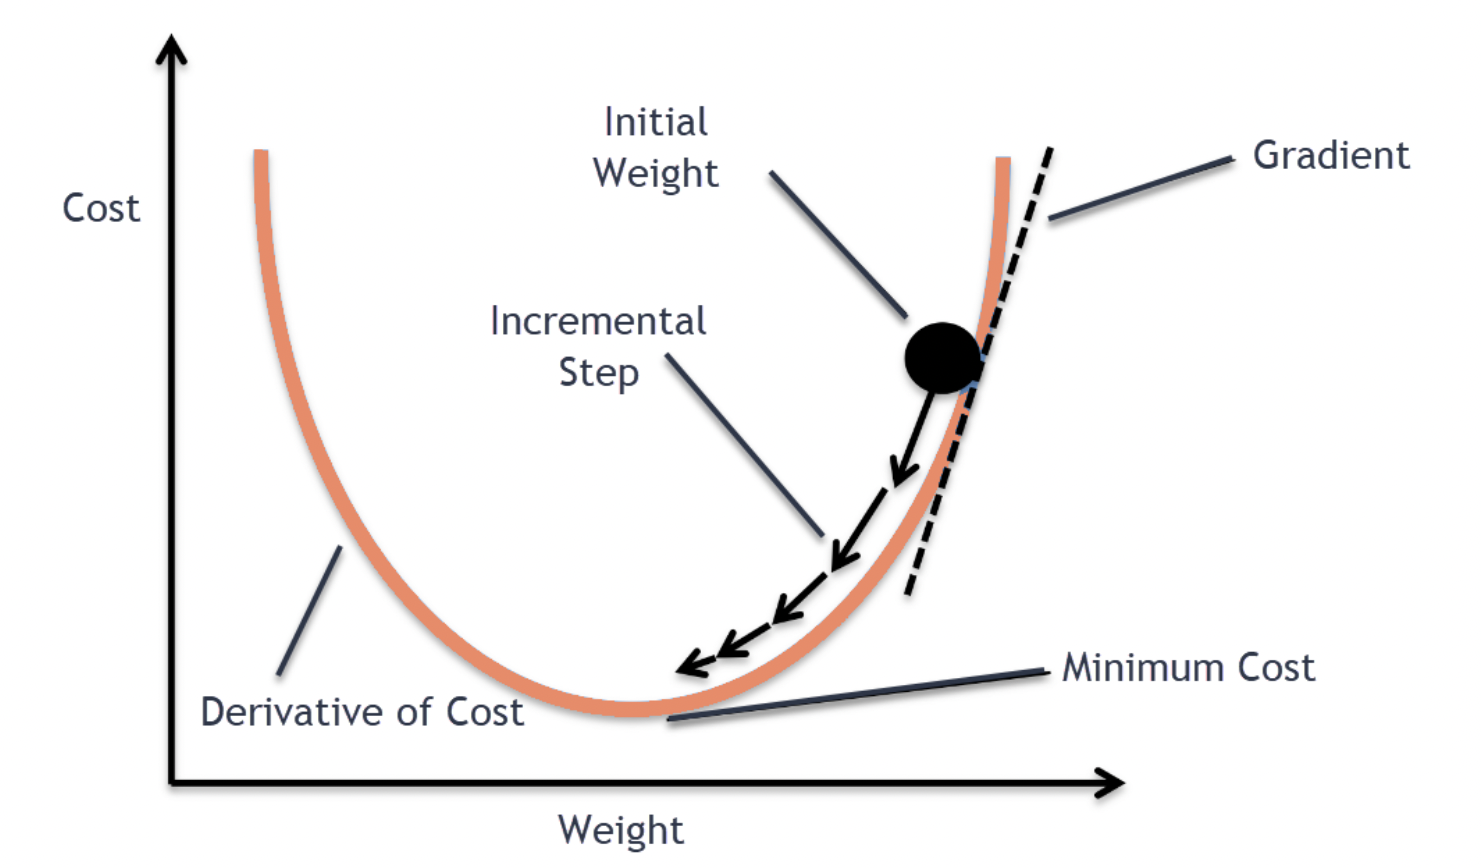

In [9]:
Image.open('Figures/gradientdescent.png')

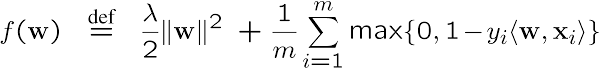

In [10]:
Image.open('Figures/hinge_loss.png')

Hinge loss function as **cost** function.

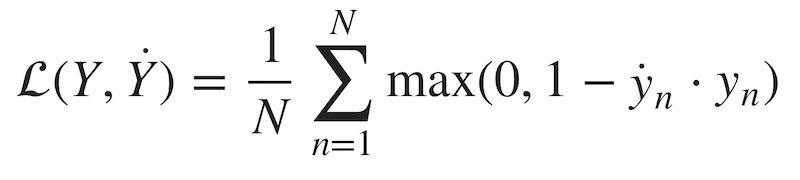

In [11]:
Image.open('Figures/hinge_loss_gradd.png')

* y^.: ypred 

**Gradient** of the Hinge loss function 

#### Description of the Stochastic Gradient Descent Classifier 

* **#1** weights have generated randomly.

* **#2** 1st stage **#1** is applied in **stochastic_gradient_descent()** method. 

    The partial differential equations of the cost function, taken according to the intercept and coefficient, are multiplied by the **learning_rate** and subtracted to obtain the **local minimum** point. 
    
    But since there are 2 nested loops, a **stopping criterion** has been added. This criterion is the **2^nth convergence ratio test**.

* **3#** **fit()** method returns **weights**.

* **#4** **predict()** method returns the dot product of the X_test and weights. 

    For **labelling**, it is use **np.sign()**. But np.sign() returns -1 and 1. -1 has changed to 0.

In [12]:
class SGDClassifier_mine():
    
    
    """
    Linear classifiers (SVM, logistic regression, etc.) with SGD training.

    This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: 
    the gradient of the loss is estimated each sample at a time and the model is updated along the way 
    with a decreasing strength schedule (aka learning rate). 
    
    
    Hyperparameters::
    
        
        alpha : float,default=0.0001
        Constant that multiplies the regularization term. 
        The higher the value, the stronger the regularization.
        
        tol : float, default=1e-3
        The stopping criterion. Training will stop when (loss > best_loss - tol)
        
        random_state : bool, default=None
        Used for shuffling the data.
        
        weights : numpy array, default=None
        To view the weights.
        
        max_iter : int, default=1000  
        The maximum number of passes over the training data (aka epochs). 
    
    
    """
    
    def __init__(self,alpha=0.0001,tol=0.001,random_state=None,weights=None,max_iter=1000):
        
        self.alpha=alpha
        self.tol=tol
        self.random_state=random_state
        self.weights=weights
        self.max_iter=max_iter
          
    
    def cost_function(self,w,X,y):
        
        n=X.shape[0]
        distance=1- (y*np.dot(X,w))
        distance[distance<0]=0 # equivalent to max(0, distance) in the formula (hinge loss funtion ) max(0,1-y*np.dot(x,w))
        #1/self.alpha == regularization_strength
        hinge_loss=1/self.alpha*(distance.sum()/n)
        
        return ((1/2)*np.linalg.norm(w)**2 )+ hinge_loss  
        #The reason that 1/2 at the return is : there is lambda variable as regularization_strength*alpha =1
    
    
    def cost_function_gradient(self,w,X,y):
        
        weights_grad=np.zeros(w.shape[0])
        distance = np.array([1 - (y * np.dot(X, w))])
        
        if max(0,distance)==0: #equivalent to max(0, distance) in the formula (hinge loss funtion ) max(0,1-y*ypred))
            
            dw=w
        else :
            
            dw=w.ravel()- (1/self.alpha*np.dot(X,y))
            
        weights_grad+=dw
            
        return weights_grad/X.shape[0] #average=True
    

                
    def stochastic_gradient_descent(self,X,y):
        
        epochs = self.max_iter 
        weights = np.random.rand(X.shape[1])
        nth=0
        learning_rate=0.0001 #learning rate 
        best_cost = float("inf")
        
        for epoch in range(1,epochs): 
            X_train,y_train=shuffle(X,y,random_state=self.random_state) #shuffle=True
             
            for idx,x_train in enumerate(X_train):
                loss = self.cost_function_gradient(weights, x_train, y_train[idx])
                weights -= (learning_rate* loss)

            if epoch == 2 ** nth or epoch == epochs - 1: #2**nth convergence ratio test
                cost = self.cost_function(weights, X, y)
                
                if cost>best_cost-self.tol:
                    return weights
                
                best_cost = cost
                nth += 1

        return weights
                
                
    
    def fit(self,X,y):
        
        self.weights=self.stochastic_gradient_descent(X,y)
        
    
    def predict(self,X):
        
        ypred=np.sign(np.dot(X,self.weights))
        ypred[ypred==-1]=0
        
        return ypred
    
    
            

Text(0.5, 1.0, 'Unclassified Test Data')

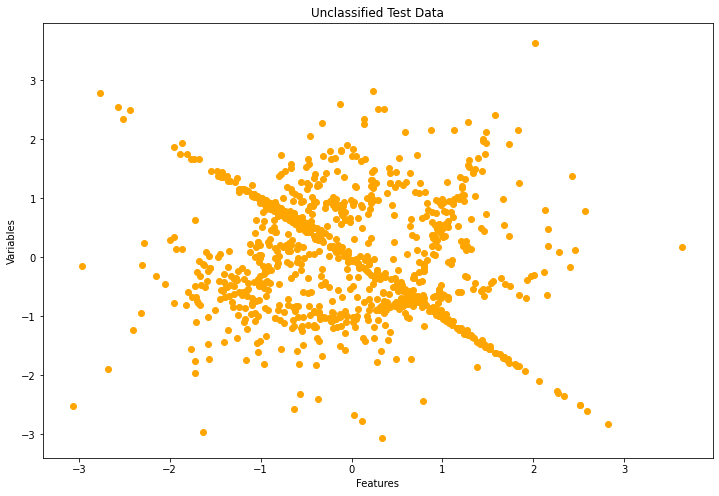

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(X_test[:,0],X_test[:,1],c='orange')
plt.scatter(X_test[:,1],X_test[:,2],c='orange')
plt.scatter(X_test[:,2],X_test[:,3],c='orange')
plt.xlabel('Features')
plt.ylabel('Variables')
plt.title('Unclassified Test Data')

#### Hand-made Results

In [14]:
from sklearn.metrics import accuracy_score,f1_score,jaccard_score,confusion_matrix
import seaborn as sns

In [15]:
model=SGDClassifier_mine(alpha=0.0001,tol=0.001,max_iter=1000,random_state=42)

In [16]:
model.fit(X_train,y_train)

In [17]:
yhat_mine=model.predict(X_test)

In [18]:
accuracy_score(y_test,yhat_mine)

0.8545454545454545

In [19]:
accuracy_score(y_test,yhat_mine)

0.8545454545454545

In [20]:
jaccard_score(y_test,yhat_mine)

0.7446808510638298

In [21]:
cm_mine=confusion_matrix(y_test,yhat_mine)

#### Plots Hand-made

Text(0.5, 1.0, 'Hand-made Confusion Matrix')

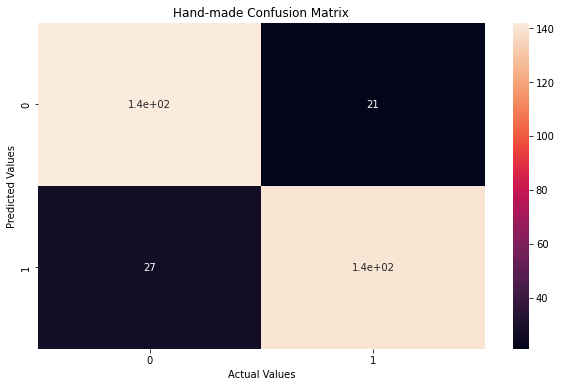

In [22]:
fig=plt.figure(figsize=(10,6))
fig=sns.heatmap(cm_mine,annot=True)
fig.set(xlabel='Actual Values', ylabel='Predicted Values')
plt.title('Hand-made Confusion Matrix')

Text(0.5, 1.0, 'Classified Predict Data (Hand-made)')

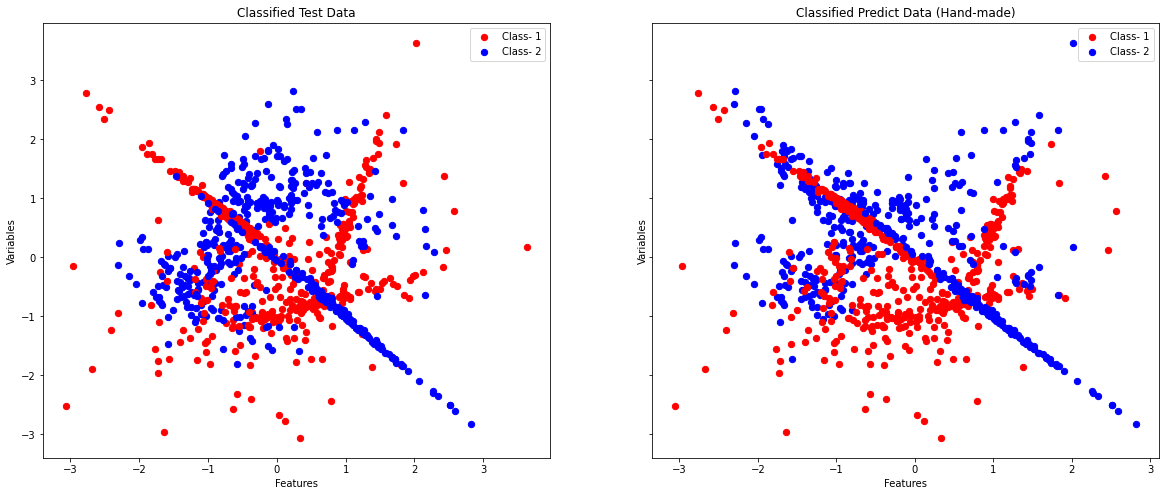

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax1.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], s = 40, c = 'b')

ax1.scatter(X_test[y_test == 0, 2], X_test[y_test == 0, 3], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 2], X_test[y_test == 1, 3], s = 40, c = 'b')

ax1.legend()
ax1.set_xlabel('Features')
ax1.set_ylabel('Variables')
ax1.set_title('Classified Test Data')

ax2.scatter(X_test[yhat_mine == 0, 0], X_test[yhat_mine == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax2.scatter(X_test[yhat_mine == 1, 0], X_test[yhat_mine == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax2.scatter(X_test[yhat_mine == 0, 1], X_test[yhat_mine == 0, 2], s = 40, c ='r')
ax2.scatter(X_test[yhat_mine == 1, 0], X_test[yhat_mine == 1, 2], s = 40, c = 'b')

ax2.scatter(X_test[yhat_mine == 0, 2], X_test[yhat_mine == 0, 3], s = 40, c ='r')
ax2.scatter(X_test[yhat_mine == 1, 2], X_test[yhat_mine == 1, 3], s = 40, c = 'b')

ax2.legend()
ax2.set_xlabel('Features')
ax2.set_ylabel('Variables')
ax2.set_title('Classified Predict Data (Hand-made)')

#### Sklearn Results

In [24]:
from sklearn.linear_model import SGDClassifier

In [25]:
model=SGDClassifier(alpha=0.0001,tol=0.001,max_iter=1000,average=True,random_state=42)

In [26]:
model.fit(X_train,y_train)

SGDClassifier(average=True, random_state=42)

In [27]:
yhat_sklearn=model.predict(X_test)

In [28]:
accuracy_score(y_test,yhat_sklearn)

0.8787878787878788

In [29]:
f1_score(y_test,yhat_sklearn)

0.8802395209580839

In [30]:
jaccard_score(y_test,yhat_sklearn)

0.786096256684492

In [31]:
cm_sklearn=confusion_matrix(y_test,yhat_sklearn)

#### Plots Sklearn

Text(0.5, 1.0, 'Sklearn Confusion Matrix')

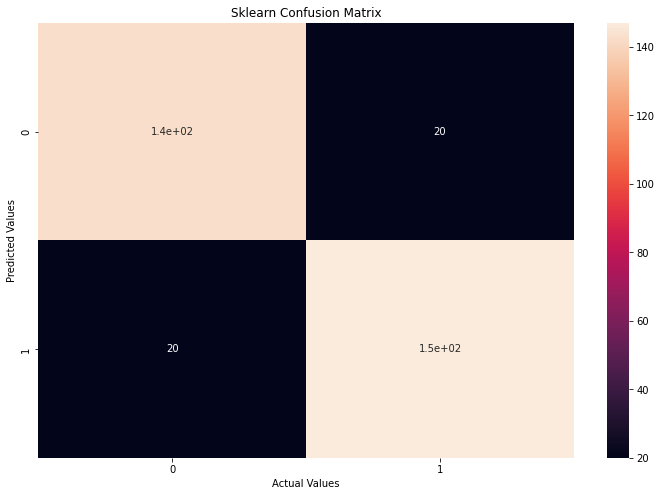

In [32]:
fig=plt.figure(figsize=(12,8))
fig=sns.heatmap(cm_sklearn,annot=True)
fig.set(xlabel='Actual Values', ylabel='Predicted Values')
plt.title('Sklearn Confusion Matrix')

Text(0.5, 1.0, 'Classified Predict Data (Sklearn)')

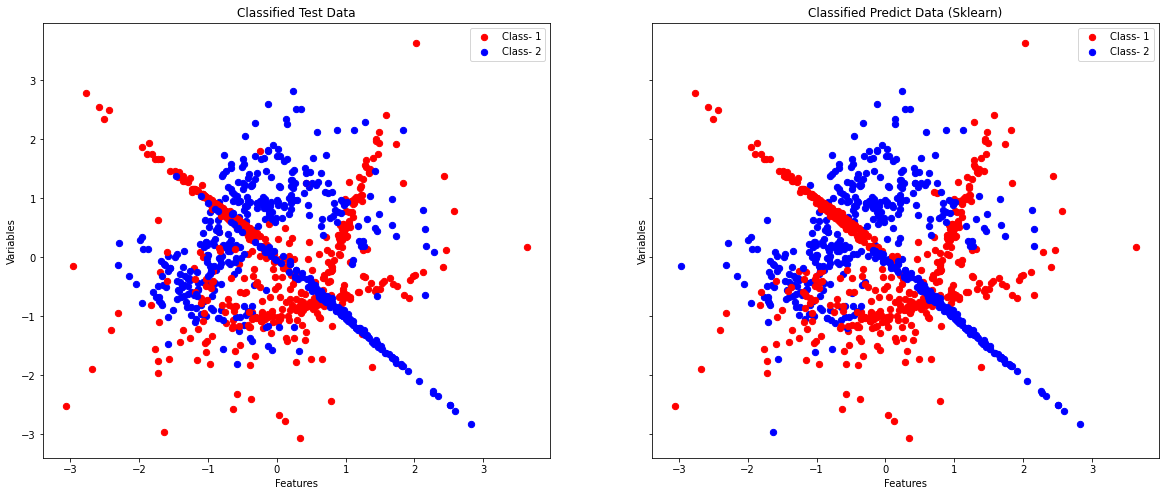

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))
ax1.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax1.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax1.scatter(X_test[y_test == 0, 1], X_test[y_test == 0, 2], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 1], X_test[y_test == 1, 2], s = 40, c = 'b')

ax1.scatter(X_test[y_test == 0, 2], X_test[y_test == 0, 3], s = 40, c ='r')
ax1.scatter(X_test[y_test == 1, 2], X_test[y_test == 1, 3], s = 40, c = 'b')

ax1.legend()
ax1.set_xlabel('Features')
ax1.set_ylabel('Variables')
ax1.set_title('Classified Test Data')

ax2.scatter(X_test[yhat_sklearn== 0, 0], X_test[yhat_sklearn == 0, 1], s = 40, c ='r', label = 'Class- 1')
ax2.scatter(X_test[yhat_sklearn == 1, 0], X_test[yhat_sklearn == 1, 1], s = 40, c ='b', label = 'Class- 2')

ax2.scatter(X_test[yhat_sklearn == 0, 1], X_test[yhat_sklearn == 0, 2], s = 40, c ='r')
ax2.scatter(X_test[yhat_sklearn == 1, 1], X_test[yhat_sklearn == 1, 2], s = 40, c = 'b')

ax2.scatter(X_test[yhat_sklearn == 0, 2], X_test[yhat_sklearn == 0, 3], s = 40, c ='r')
ax2.scatter(X_test[yhat_sklearn == 1, 2], X_test[yhat_sklearn == 1, 3], s = 40, c = 'b')

ax2.legend()
ax2.set_xlabel('Features')
ax2.set_ylabel('Variables')
ax2.set_title('Classified Predict Data (Sklearn)')